In [ ]:
# default_exp train.wavenet

In [ ]:
# hide
import sys

sys.path.append("..")

In [ ]:
# hide
from nbdev.showdoc import *
from fastcore.test import *

/home/tako/dev/env3.7/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env3.7/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
#export
from fastcore.utils import *
from fastcore.imports import *
from fastai2.basics import *
from fastseq.models.wavenet import *
from fastseq.core import *


# Train

In [ ]:
from fastseq.data.load import *
from fastseq.data.transforms import *
from fastai2.data.all import *

In [ ]:
horizon = 12
lookback = 128

In [ ]:
path = untar_data(URLs.m4_daily)
path

Path('/home/tako/.fastai/data/m4_daily')

In [ ]:
train = pd.read_csv(path/'train.csv',skiprows =skip ).iloc[:, 1:].values
test = pd.read_csv(path/'val.csv').iloc[:, 1:].values

In [ ]:
t_ds = TimeSeriesDataset(ts_lists(train),
                                     lookback,
                                     horizon,
                                     step=1,
                                     static_covs = [1,2,2,2,2],
                                     transform = [ToTensor(),Cuda()]
                                    )

In [ ]:
for i, ts in enumerate(t_ds):
    if (ts[0].dtype) is not torch.float32:
        print(ts[0].device)
        print(i)
        print(ts)
        break
        

KeyboardInterrupt: 

In [ ]:
train_dl = DataLoader(TimeSeriesDataset(ts_lists(train),
                                     lookback,
                                     horizon,
                                     step=1,
                                     static_covs = [1,2,2,2,2],
                                     transform = ToTensor()
                                    ),
                   batch_size=64,
                   shuffle=True,
                   pin_memory=True,
                   num_workers=1,                  
                  )

test_dl = DataLoader(TimeSeriesDataset(ts_lists(test),
                                     lookback,
                                     horizon,
                                     step=1,
                                     static_covs = [1,2,2,2,2],
                                     transform = ToTensor()
                                    ),
                   batch_size=64,
                   shuffle=False,
                   pin_memory=True,
                   num_workers=1,                  
                  )

In [ ]:
model = WaveNet(input_channels=1,
                output_channels=1,
                horizon=horizon,
                    
               )

print('Number of model parameters: {}.'.format(model.n_parameters))
print('Receptive field size: {}.'.format(model.receptive_field_size))

# # .. and the loss
# loss = torch.distributions.StudentT

Number of model parameters: 122672.
Receptive field size: 128.


In [ ]:
data = DataLoaders(train_dl, test_dl).cuda()
learn = Learner(data, model, loss_func= F.mse_loss, opt_func= Adam, metrics=accuracy)

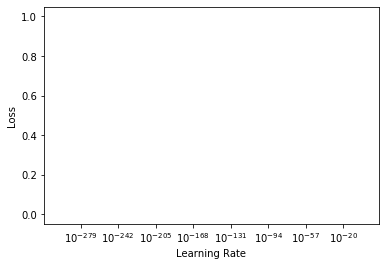

In [ ]:
from fastai2.callback.all import *
learn.lr_find()

In [ ]:
# hide
from nbdev.export import *

notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
Converted 02_data.load.ipynb.
This cell doesn't have an export destination and was ignored:
 
Converted 02_deep4cast_m4_example.ipynb.
Converted 03_data.load.ipynb.
Converted 04_data.transforms.ipynb.
Converted 05_models.wavenet.ipynb.
Converted index.ipynb.


NameError: name '__version__' is not defined